In [1]:
import pandas as pd
import numpy as np


In [2]:
# parse the html
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df[0].head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [3]:
data = df[0]
# drop the Noth assigned Borough
data.drop(data[data['Borough'] == 'Not assigned'].index, axis = 0, inplace = True)

In [4]:
data.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [5]:
# using a groupby function to group them together and then use aggregate function to paste them together
data = data.groupby(['Postcode','Borough']).agg(lambda x:', '.join(x))
data.head()

,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [6]:
# if Neighbourhood is not assigned, it is same as Borough
data = pd.DataFrame(data['Neighbourhood'].apply(lambda x: data.index[1] if x == 'Not assigned' else x))
data.head()

,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [7]:
# shape of the dataframe
data.shape
#The borough and the Postcode become the index so it's not a column anymore

(103, 1)

In [8]:
!pip install geocoder
import geocoder # import geocoder

     |████████████████████████████████| 102kB 417kB/s ta 0:00:01


### The geocoder is not well functioning so instead I used the geo position data provided



In [9]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
data.reset_index(inplace = True)

In [11]:

data.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [12]:
df_data_1.rename(columns = {'Postal Code': 'Postcode' }, inplace = True)
df_data_1.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
data_geo = pd.merge(data, df_data_1, on ='Postcode')

In [14]:
data_geo.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Visualize the data

In [15]:
!pip install folium
import folium


     |████████████████████████████████| 92kB 1.2MB/s eta 0:00:01


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
cluster_df = data_geo[['Latitude', 'Latitude']]
ss = StandardScaler()
cluster_df = ss.fit_transform(cluster_df)
cluster_df[0:10]

array([[ 1.95523876,  1.95523876],
       [ 1.53094905,  1.53094905],
       [ 1.12942801,  1.12942801],
       [ 1.271543  ,  1.271543  ],
       [ 1.3126078 ,  1.3126078 ],
       [ 0.76859251,  0.76859251],
       [ 0.44670528,  0.44670528],
       [ 0.12457862,  0.12457862],
       [ 0.2242631 ,  0.2242631 ],
       [-0.22890739, -0.22890739]])

In [19]:
distances = []
k = []
for n in range(1,20):
    k.append(n)
    km = KMeans(n_clusters=n)
    km.fit(cluster_df)
    distances.append(km.inertia_)

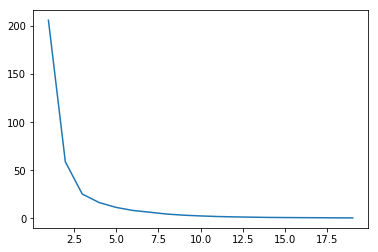

In [20]:
plt.plot(k, distances)

Best K could be 3

In [21]:
km = KMeans(n_clusters=3)
km.fit(cluster_df)
data_geo['clusters'] = km.labels_

In [22]:
km.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
map =folium.Map(location = [data_geo['Latitude'].mean(), data_geo['Longitude'].mean()], zoom_start=13, title = 'Mapbox Bright')
for x,y,z in data_geo[['Latitude','Longitude','clusters']].values.tolist():
    if z == 0:
        folium.Marker([x,y], tooltip=z, icon=folium.Icon(icon='cloud')).add_to(map)
    elif z == 1:
        folium.Marker([x,y], tooltip=z, icon=folium.Icon(color='green')).add_to(map)
    elif z == 2:
        folium.Marker([x,y], tooltip=z, icon=folium.Icon(color='red')).add_to(map)
        
map